#**Titanic - Machine Learning From Disaster**
Lets breakdown the solution into three main parts:
1. Exploratory Data Analysis & Feature Engineering.
2. Modelling and Evaluation.
3. Submitting Prediction on Kaggle.

## **EDA**

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_path = "/content/train.csv"
test_path = "/content/test.csv"

# Load trian and test data
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

### **Inspect the data**

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Missing Values**

In [5]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


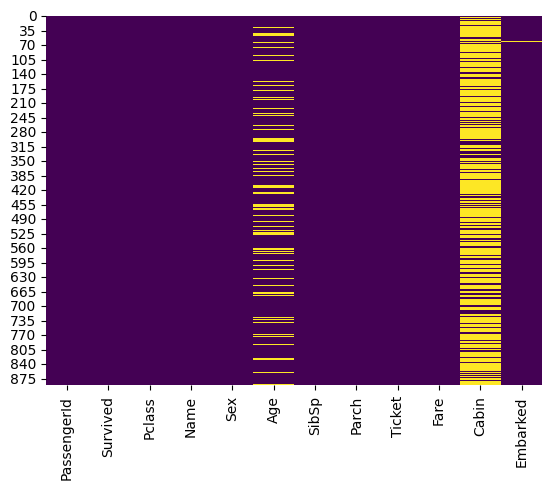

In [6]:
# Heatmap to visualize the missing values
sns.heatmap(train.isna(), cbar=False, cmap="viridis")
plt.show()

In [7]:
# Correaltion between numeric feature
corr_matrix = train[["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]].corr()
print(corr_matrix)

          Survived    Pclass       Age      Fare     SibSp     Parch
Survived  1.000000 -0.338481 -0.077221  0.257307 -0.035322  0.081629
Pclass   -0.338481  1.000000 -0.369226 -0.549500  0.083081  0.018443
Age      -0.077221 -0.369226  1.000000  0.096067 -0.308247 -0.189119
Fare      0.257307 -0.549500  0.096067  1.000000  0.159651  0.216225
SibSp    -0.035322  0.083081 -0.308247  0.159651  1.000000  0.414838
Parch     0.081629  0.018443 -0.189119  0.216225  0.414838  1.000000


### **Visualize Relationship**

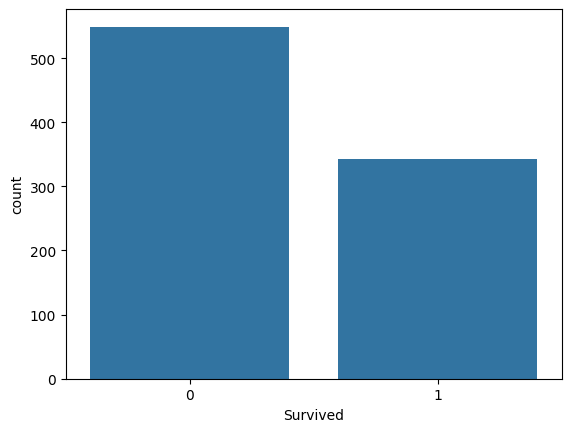

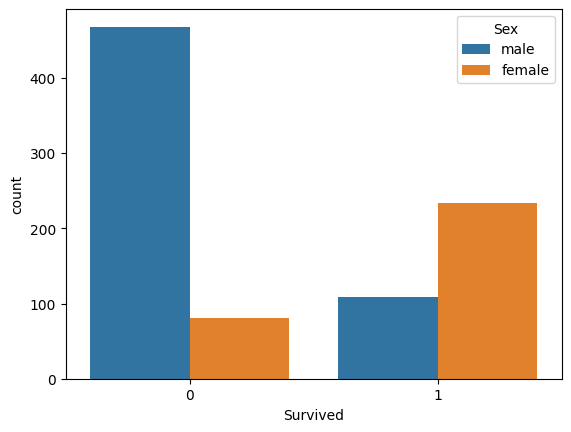

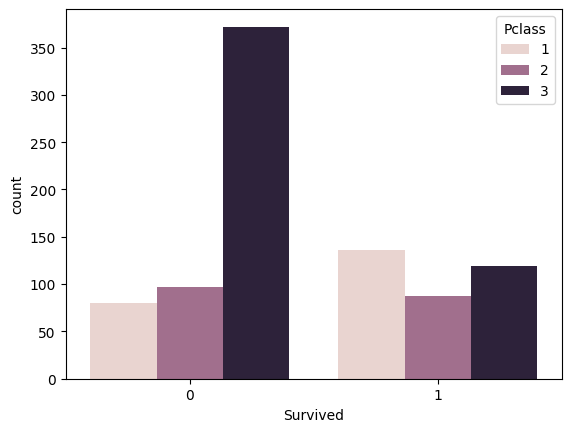

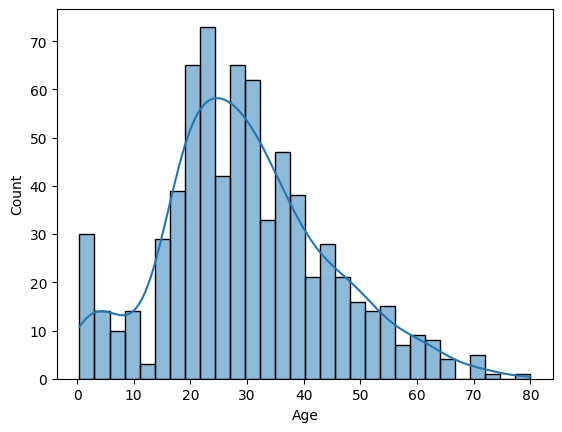

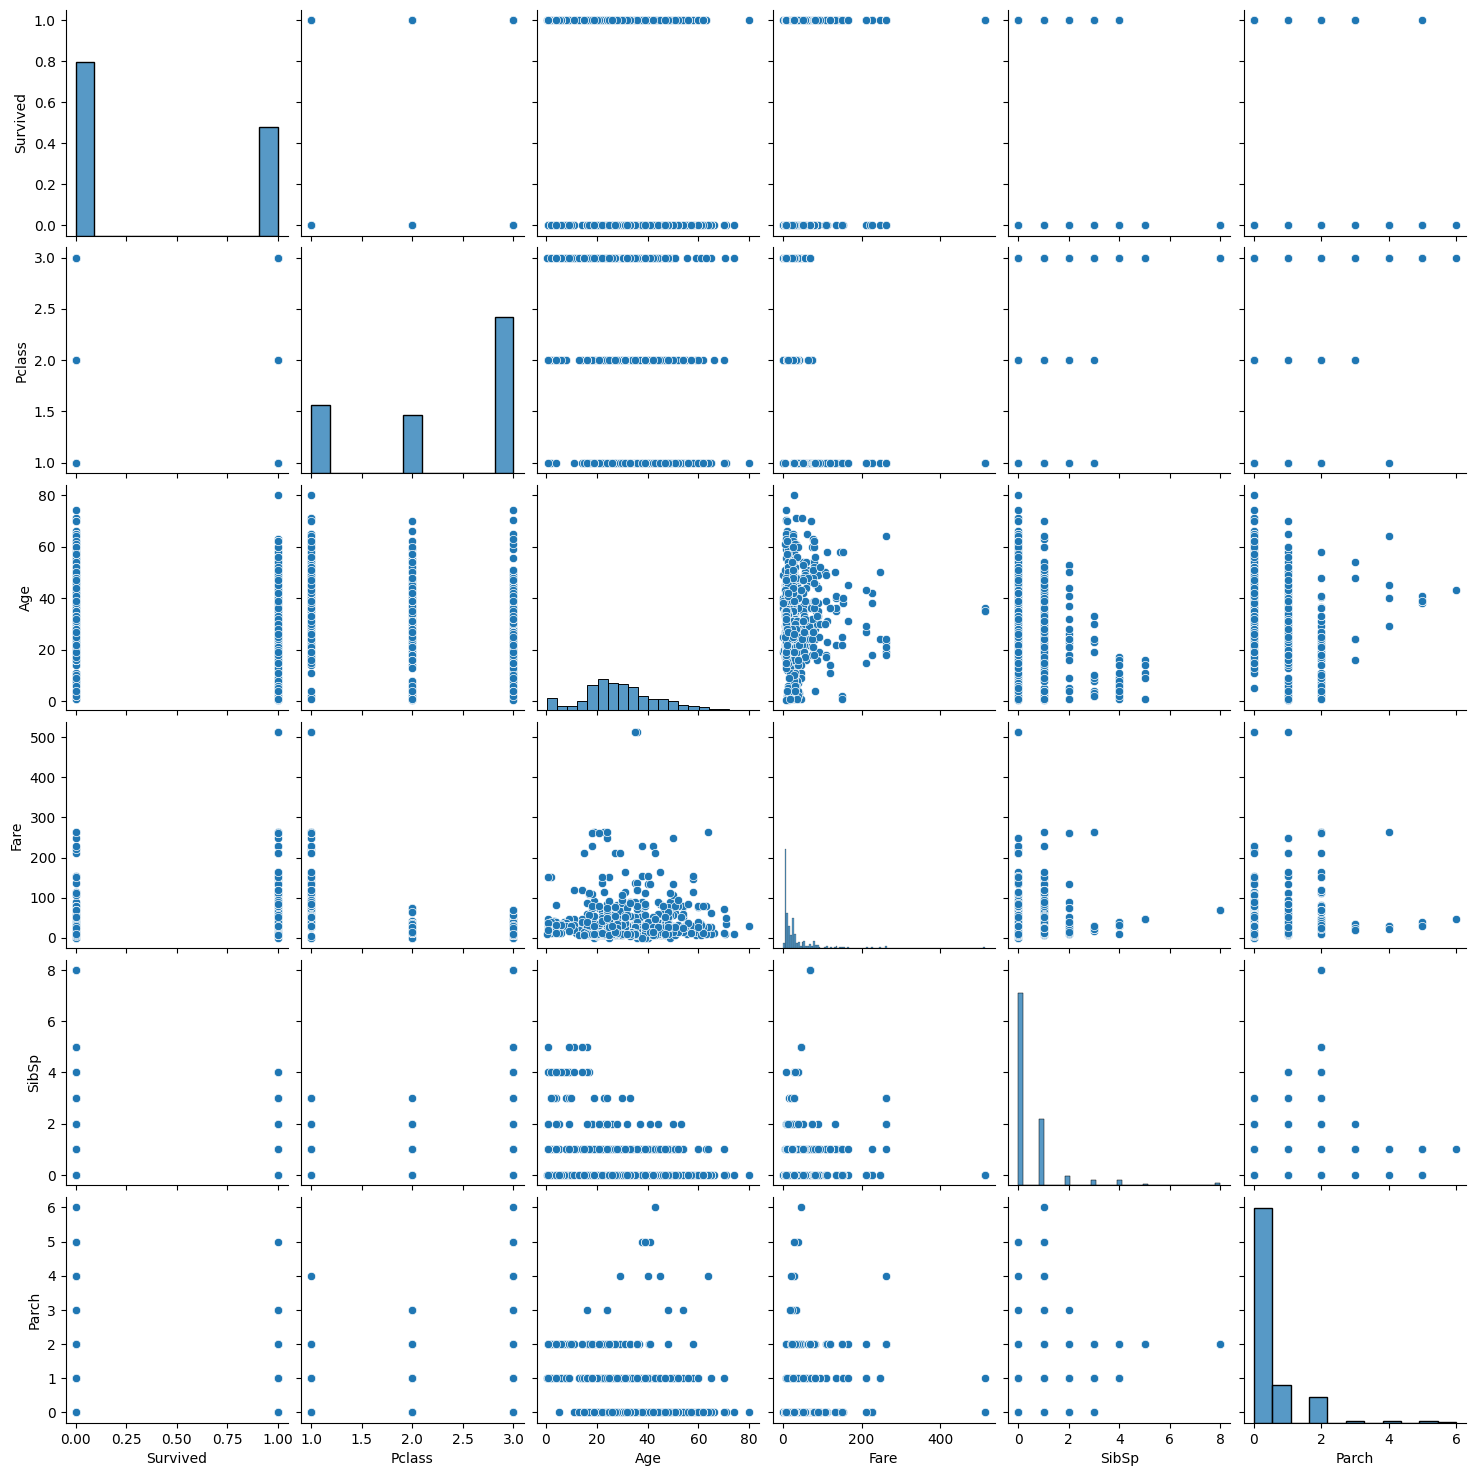

In [8]:
# Survived vs not survived
sns.countplot(data = train, x = "Survived")
plt.show()

# Survival rate by sex
sns.countplot(data = train, x = "Survived", hue="Sex")
plt.show()

# Survival rate by passenger class
sns.countplot(data = train, x = "Survived", hue = "Pclass")
plt.show()

# Age distribution
sns.histplot(train['Age'].dropna(), bins = 30, kde= True)
plt.show()

# Pairplot to see relationship between numeric features
sns.pairplot(train[["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]])
plt.show()

## **Feature Enginnering**

### **Handling missing values**

In [9]:
# Fill missing 'Age' values with the median age
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())

# Fill the missing 'Embarked' values with the mode (most frequent value)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Drop 'Cabin' as it has too many missing values
if 'Cabin' in train.columns:
  train.drop(columns='Cabin', inplace=True)

if 'Cabin' in test.columns:
  test.drop(columns='Cabin', inplace=True)

## **Encoding Categorical Variables**

In [10]:
# Convert 'Sex' into numerical values
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})

# One-hot encode 'Embarked'
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

## **Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Applying StandardScaler to 'Age' and 'Fare'
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])
test[['Age', 'Fare']] = scaler.transform(test[['Age', 'Fare']])

## **Modelling and Evaluation**

### **Split Columns**

In [12]:
# Define Features (Drop columns that are not needed)
X = train.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y = train['Survived']

# Define test features (similarly drop unused columns)
X_test = test.drop(columns=['PassengerId', 'Name', 'Ticket'])

### **Train-Test Split**

In [13]:
from sklearn.model_selection import train_test_split

# Split data for training and valuation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### **Train the model (Random forest)**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Intialize RandomForestClassifer
rf_model = RandomForestClassifier(n_estimators=10000, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model
print(f"Validation Accuracy:\n {accuracy_score(y_val, y_pred)} \n")
print(f"Confusion matrix:\n {confusion_matrix(y_val, y_pred)} \n")
print(f"classification Report:\n {classification_report(y_val, y_pred)} \n")

Validation Accuracy:
 0.8156424581005587 

Confusion matrix:
 [[90 15]
 [18 56]] 

classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179
 



### **Hyperparameter Tuning**

In [15]:
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter to search
param_grid = {
    'n_estimators': [5000, 10000, 20000, 30000],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15]
}

# Intialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameter
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Best parameters: {'max_depth': 20, 'min_samples_split': 15, 'n_estimators': 20000}


In [23]:
# Define Hyperparameter to search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15]
}

# Intialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameter
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 5, 'min_samples_split': 15, 'n_estimators': 100}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [24]:
# Get the best model
best_model = grid_search.best_estimator_

In [25]:
# Predict on test set
test_prediction = best_model.predict(X_test)

# Create a DataFrame for Submission
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_prediction
})

# Save the submission to a CSV file
submission.to_csv('titanic_submission_new.csv', index = False)